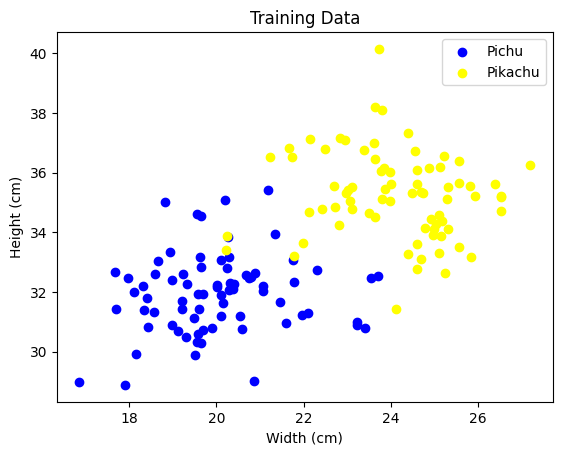


Klassificering av testpunkter
Testpunkt (25.0, 32.0) → Pikachu
Testpunkt (24.2, 31.5) → Pikachu
Testpunkt (22.0, 34.0) → Pikachu
Testpunkt (20.5, 34.0) → Pichu


In [ ]:
import math
import matplotlib.pyplot as plt
import re

# Läser in träningsdatan

def load_training_data(filename):
    data = []
    with open(filename, "r") as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith("("):
                continue

            parts = line.split(",")
            if len(parts) != 3:
                continue

            width = float(parts[0].strip())
            height = float(parts[1].strip())
            label_num = int(parts[2].strip())

            label = "Pikachu" if label_num == 1 else "Pichu"
            data.append((width, height, label))
    return data


# Plottar alla punkter

def plot_training_data(data):
    x_pichu = [w for w, h, lbl in data if lbl == "Pichu"]
    y_pichu = [h for w, h, lbl in data if lbl == "Pichu"]

    x_pikachu = [w for w, h, lbl in data if lbl == "Pikachu"]
    y_pikachu = [h for w, h, lbl in data if lbl == "Pikachu"]

    plt.scatter(x_pichu, y_pichu, color="blue", label="Pichu")
    plt.scatter(x_pikachu, y_pikachu, color="yellow", label="Pikachu")

    plt.xlabel("Width (cm)")
    plt.ylabel("Height (cm)")
    plt.title("Training Data")
    plt.legend()
    plt.show()


# Läser in testpunkter

def load_testpoints(filename):
    points = []
    pattern = re.compile(r"\((.*?)\)")

    with open(filename, "r") as f:
        for line in f:
            line = line.strip()
            if "(" not in line:
                continue

            match = pattern.search(line)
            if not match:
                continue

            nums = match.group(1).split(",")
            w = float(nums[0].strip())
            h = float(nums[1].strip())
            points.append((w, h))
    return points


# Beräknar avstånd + klassificering

def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def classify(point, training_data):
    closest = None
    min_dist = float("inf")

    for w, h, lbl in training_data:
        d = distance(point, (w, h))
        if d < min_dist:
            min_dist = d
            closest = lbl

    return closest


# Själva programet som ska köras

training_data = load_training_data("datapoints.txt")
test_points = load_testpoints("testpoints.txt")

# Plottar träningsdatan
plot_training_data(training_data)

print("\nKlassificering av testpunkter")
for w, h in test_points:
    result = classify((w, h), training_data)
    print(f"Testpunkt ({w}, {h}) → {result}")
